In [1]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
import seaborn as sns
import statsmodels.api as sm
import pandas as pd 
import numpy as np 
#Stats 
from sklearn import linear_model 
from scipy.stats import spearmanr
from scipy.stats import sem

# Abstract 

__NOTE: Abstract should be short but give but give the overall idea: what was done, what was found, and wat are the main conclusions 

Keywords: LVIS, Biomass index, LIDAR, AGBD, Allometric

# Introduction 

__NOTE: Move1: Introduce the topic and emphasize why is it important __


It is important ecosystem modeling studies and the advancement of many of those processes

__NOTE:Move2: Relate to current knowledge 
The current way of calculating biomass is using the lidar height metrics. Talk about RH values  RH100 is the top of the canopy. 

It is important ecosystem modeling studies and the advancement of many of those processes

__NOTE:Move3: Introduce your work give the purpose and main objective 


Talk about the Allometric relationship ,Biomass index ,AGBD – aboveground biomass density 

# Methodogly 

## DATA 

# Start Here 

Calculating at the foot print, 0625 hec, 025 hec and hector level. 

In [71]:
# Import necessary packages
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py

import seaborn as sns
import statsmodels.api as sm
import pandas as pd 
import numpy as np 
#Stats 
from sklearn import linear_model 
from scipy.stats import spearmanr
from scipy.stats import sem

In [72]:

datadir = r'D:/Gabon_Lidar/DATA/email_122620/'

tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

### Bring in the DATA

In [73]:
footprint = pd.read_csv(datadir+'LVIS2_withPlots.csv')#mass of above-ground components of tree (kg) 
footprint.to_csv(datadir +'footprint.csv')
tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

### Organize Plot data for trees 

In [74]:
#Creating the .25 hec plots 
tree.loc[(tree['subplot'] == 1)|(tree['subplot'] == 2)| (tree['subplot'] == 7)| (tree['subplot'] == 8), 'subplot25'] = '1.2'
tree.loc[(tree['subplot'] == 4)|(tree['subplot'] == 5)| (tree['subplot'] == 3)| (tree['subplot'] == 6), 'subplot25'] = '1.1'
tree.loc[(tree['subplot'] == 12)|(tree['subplot'] == 13)| (tree['subplot'] == 11)| (tree['subplot'] == 14), 'subplot25'] = '2.1'
tree.loc[(tree['subplot'] == 9)|(tree['subplot'] == 10)| (tree['subplot'] == 15)| (tree['subplot'] == 16), 'subplot25'] = '2.2'
#Create unqure id for subplot25 and 0625 
tree['ID_subplot25'] = tree['plot'] + tree['subplot25']

tree['subplot_0625'] =  tree['subplot']
tree['subplot_0625'] =  tree['subplot'].astype(int)

In [75]:
tree['subplot_0625'] =  tree['subplot']*10

In [76]:
tree['subplot_0625'] =  tree['subplot'].astype(str)
tree['ID_subplot_0625'] = tree['plot'] + tree['subplot_0625']
#Filter for -9999
tree = tree[(tree.m_agb >= 0)]
#Create subplot tables 
tree_plot = tree 
tree_plot25 = tree 
tree_plot625 = tree

### Organize Plot data for LIDAR

 # Field data 

In [77]:
sumstep = ['ID_subplot_0625', 'm_agb']
trees_plot625_sum= tree_plot625[sumstep]
trees_plot625= trees_plot625_sum.groupby(by='ID_subplot_0625').sum()/(10**3 *.0625)
trees_plot625.to_csv(datadir +'trees_plot625.csv')
trees_plot625 = pd.read_csv(datadir + 'trees_plot625.csv')

sumstep = ['ID_subplot25', 'm_agb']
trees_plot25_sum= tree_plot25[sumstep]
trees_plot25= trees_plot25_sum.groupby(by='ID_subplot25').sum()/(10**3 *.25)
trees_plot25.to_csv(datadir +'trees_plot25.csv')
trees_plot25 = pd.read_csv(datadir + 'trees_plot25.csv')

sumstep = ['plot', 'm_agb']
trees_plot_sum= tree_plot[sumstep]
trees_plot= trees_plot_sum.groupby(by='plot').sum()/(10**3 )
trees_plot.to_csv(datadir +'trees_plot.csv')
trees_plot = pd.read_csv(datadir + 'trees_plot.csv')

# LIDAR processing

In [78]:
L2all = pd.read_csv(datadir+'LVIS2_withPlots.csv')
#Create unqure id for subplot25 and 0625 
L2all['subplot025'] =   L2all['subplot025'].astype(str)
L2all['ID_subplot25'] =L2all['plot'] + L2all['subplot025']

L2all = L2all[(L2all.subplot625 >= 0)]
L2all['subplot625'] =   L2all['subplot625'].astype(int)

In [79]:
L2all['subplot625'] =   L2all['subplot625'].astype(str)
L2all['ID_subplot625'] = L2all['plot'] + L2all['subplot625']


# remove special character 
L2all.ID_subplot625 = L2all.ID_subplot625.str.replace('.', '') 
#Create subplot tables


###  LIDAR filtering

In [80]:
sub_set = ['SHOTNUMBER', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100','bio_mass_index','agbd','ID_subplot625', 'plot','ID_subplot25']
L2all = L2all[sub_set]



In [81]:
#RA - Do this for each of the plots 
#filter out unneeded columns#Remove Agbd 
L2_All_625 = L2all.groupby(by='ID_subplot625').mean()
L2_All_625.to_csv(datadir +'L2_All_625.csv')
L2_All_625 = pd.read_csv(datadir + 'L2_All_625.csv')

L2_All_25 = L2all.groupby(by='ID_subplot25').mean()
L2_All_25.to_csv(datadir +'L2_All_25.csv')
L2_All_25 = pd.read_csv(datadir + 'L2_All_25.csv')

L2_All_plot = L2all.groupby(by='plot').mean()
L2_All_plot.to_csv(datadir +'L2_All_plot.csv')
L2_All_plot = pd.read_csv(datadir + 'L2_All_plot.csv')

# LIDAR Graphs 

<AxesSubplot:xlabel='RH50', ylabel='bio_mass_index'>

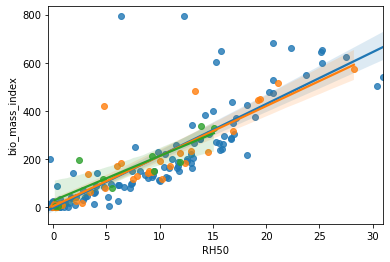

In [82]:
sns.regplot(data=L2_All_625, x='RH50', y='bio_mass_index')
sns.regplot(data=L2_All_25, x='RH50', y='bio_mass_index')
sns.regplot(data=L2_All_plot, x='RH50', y='bio_mass_index')

<AxesSubplot:xlabel='bio_mass_index', ylabel='agbd'>

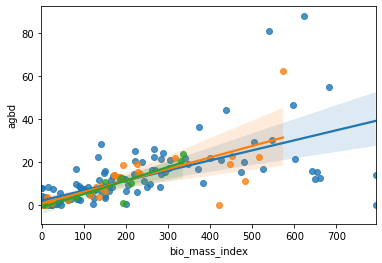

In [83]:


sns.regplot(data=L2_All_625, x="bio_mass_index", y="agbd")
sns.regplot(data=L2_All_25, x="bio_mass_index", y="agbd")
sns.regplot(data=L2_All_plot,x="bio_mass_index", y="agbd")


<AxesSubplot:xlabel='RH50', ylabel='agbd'>

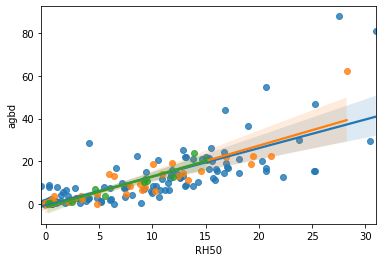

In [84]:

sns.regplot(data=L2_All_625, x="RH50", y="agbd")
sns.regplot(data=L2_All_25, x="RH50", y="agbd")
sns.regplot(data=L2_All_plot,x="RH50", y="agbd")


# LIDAR  MLR Regression Charts 

In [85]:
# I need to make a plot of this 022321
L2_All_footprint = L2_All_footprint.dropna()
df = L2_All_footprint

reg = linear_model.LinearRegression()
reg.fit(df[['RH10', 'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45',
       'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90',
       'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100']],df.agbd)
reg.coef_
reg.intercept_

-2.9532592353514655

In [86]:
reg.coef_

array([-1.39771376e+00,  1.68251735e+00,  1.27875227e+00, -2.94134473e+00,
        6.89463495e+00, -8.14662890e+00, -4.38320371e+00,  1.21964297e+01,
       -8.98424247e+00,  9.34040007e+00, -3.98974398e+00, -2.61636585e+00,
        1.85637724e+00,  4.36319192e-03,  5.41138835e-01, -8.27690268e-01,
       -3.52293835e-01,  7.35590546e-01,  2.59343694e-01,  9.52222893e-02,
       -9.65184457e-01,  5.89472718e-01,  1.46209186e-01])

In [87]:
L2_All_footprint = L2_All_footprint.dropna()
df = L2_All_footprint

reg = linear_model.LinearRegression()
reg.fit(df[['RH10', 'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45',
       'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90',
       'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100']],df.bio_mass_index)
reg.coef_
reg.intercept_

-32.646569408376706

In [88]:
reg.coef_

array([-33.38257569,  67.3343523 , -28.99212792,  11.3549582 ,
       -61.90693208,  86.1683937 , -41.54236841,  -4.13389981,
        29.69075098, -56.43197886,  90.5247162 , -59.67124222,
       -14.53430869,  38.18665042, -10.97855302,  12.75859295,
        -4.89842731,  26.51918179, -54.70560827,  26.09347998,
         5.90296118,  -5.38561374,   0.98811435])

In [89]:
reg.intercept_

-32.646569408376706

# Join Tree and LIDAR DATA 

### Subplot_625  Join 

In [90]:
L2_All_625

,ID_subplot625,SHOTNUMBER,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,...,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd
0,NASA011,9902931.5,-0.560000,0.930000,2.095000,3.025000,3.850000,4.595000,5.270000,5.830000,...,9.645000,10.280000,11.285000,11.590000,11.960000,12.445000,13.155000,15.025000,793.077065,0.156629
1,NASA0116,9903715.5,-1.600000,-1.115000,-0.740000,-0.405000,-0.035000,0.265000,0.600000,1.015000,...,5.945000,7.590000,9.985000,11.145000,12.190000,13.195000,14.430000,16.070000,0.274309,4.032319
2,NASA018,9903155.5,-1.530000,-1.010000,-0.600000,-0.155000,0.335000,0.930000,1.605000,2.395000,...,6.875000,7.510000,8.375000,8.635000,9.005000,9.455000,10.245000,11.645000,47.272262,0.222216
3,NASA019,9903417.0,-1.866667,-1.546667,-1.270000,-1.023333,-0.796667,-0.623333,-0.446667,-0.273333,...,1.393333,1.770000,2.440000,2.666667,2.966667,3.436667,4.310000,6.096667,23.173004,0.137815
4,NASA021,9898937.5,-3.370000,-2.461250,-1.768750,-1.187500,-0.673750,-0.241250,0.180000,0.611250,...,5.425000,6.643750,8.908750,10.051250,11.408750,12.485000,13.797500,15.756250,0.428357,8.128812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,NASA235,9896659.5,-0.861667,0.083333,0.860000,1.733333,2.870000,4.190000,5.475000,6.756667,...,17.570000,19.095000,20.940000,21.426667,22.298333,23.670000,24.816667,26.736667,150.561552,4.059288
138,NASA236,9896659.5,5.162500,6.827500,8.080000,9.145000,10.100000,10.940000,11.707500,12.512500,...,18.722500,20.180000,21.755000,22.147500,22.592500,23.175000,24.205000,26.972500,204.175840,9.106087
139,NASA237,9896659.5,1.295000,3.253333,5.121667,6.706667,8.165000,9.698333,11.068333,12.206667,...,23.473333,24.933333,26.688333,27.140000,27.661667,28.475000,29.483333,31.615000,265.905751,22.210316
140,NASA238,9896659.5,4.355000,7.405000,10.025000,12.602500,15.145000,17.072500,18.397500,19.517500,...,28.515000,30.550000,32.642500,33.127500,33.615000,34.195000,34.942500,36.552500,474.037408,15.506596


In [93]:
subplot625 =  L2_All_625.set_index('ID_subplot625').join(trees_plot625.set_index('ID_subplot_0625'))
subplot25 =  L2_All_25.set_index('ID_subplot25').join(trees_plot25.set_index('ID_subplot25'))
plot_whole =  L2_All_plot.set_index('plot').join(trees_plot.set_index('plot'))

In [94]:
plot_whole

,SHOTNUMBER,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH90,RH95,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd,m_agb
plot,,,,,,,,,,,,,,,,,,,,,
NASA01,9.903317e+06,-1.442222,-0.781111,-0.255556,0.206667,0.656667,1.078889,1.512222,1.962222,2.410000,...,6.230000,7.401111,7.860000,8.356667,8.944444,9.843333,11.530000,194.529587,1.026197,25.86765
NASA02,9.899316e+06,2.966923,4.834231,6.403718,7.745000,9.008974,10.260385,11.583462,12.813974,13.886154,...,23.722308,25.963077,26.629744,27.410513,28.584615,29.747436,31.646795,335.266898,23.646090,268.65924
NASA03,9.905646e+06,-0.485750,0.763250,1.723500,2.531375,3.245250,3.869000,4.437500,4.994875,5.519250,...,11.363500,13.215500,13.704375,14.276125,14.967500,15.946500,17.901500,80.945616,3.668476,48.85899
NASA09,9.910935e+06,-2.647590,-2.113133,-1.691205,-1.326867,-1.006145,-0.696506,-0.408795,-0.130843,0.149277,...,3.091446,4.092410,4.409759,4.801928,5.345783,6.265181,8.037590,4.407012,0.289923,3.43958
NASA13,9.421158e+06,3.703939,5.760455,7.505303,8.952879,10.177121,11.445152,12.670909,13.818182,15.086364,...,24.221364,26.066970,26.576515,27.256667,28.006667,29.132879,31.421667,330.249723,20.495484,230.97228
NASA14,9.362163e+06,3.621270,5.394444,6.743651,7.866667,8.788571,9.625079,10.421429,11.189206,11.930317,...,18.757143,20.326190,20.785556,21.420952,22.118730,23.154921,24.980794,189.084187,12.572338,147.39168
NASA19,9.404512e+06,-1.545541,-1.197568,-0.925676,-0.687162,-0.466216,-0.257297,-0.042027,0.179865,0.428108,...,3.919865,5.213378,5.571081,5.993378,6.516351,7.260541,8.775946,6.112114,0.427551,5.25603
NASA20,9.411360e+06,-1.236111,-0.432778,0.285000,1.015278,1.652500,2.273611,2.913056,3.711667,4.637778,...,14.581667,17.511944,18.480278,19.598889,20.847778,22.147778,24.493056,117.034209,7.132076,73.42733
NASA21A,9.398714e+06,1.312468,3.038442,4.398831,5.555974,6.609610,7.412468,8.142208,8.852727,9.501169,...,15.817792,17.646494,18.139351,18.705714,19.446104,20.397662,22.202338,151.618232,10.585316,129.91120


<AxesSubplot:xlabel='bio_mass_index', ylabel='m_agb'>

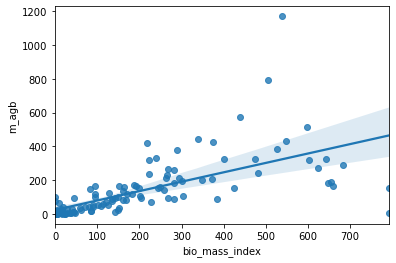

In [96]:

sns.regplot(data=subplot625, x="bio_mass_index", y="m_agb")


<AxesSubplot:xlabel='bio_mass_index', ylabel='m_agb'>

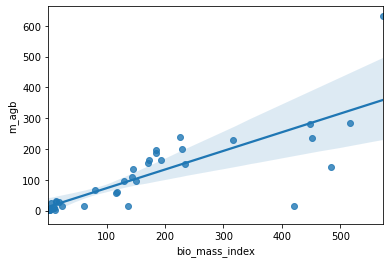

In [97]:
sns.regplot(data=subplot25,  x="bio_mass_index", y="m_agb")


<AxesSubplot:xlabel='bio_mass_index', ylabel='m_agb'>

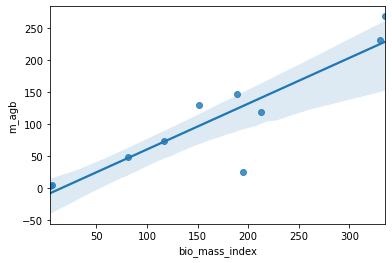

In [98]:
sns.regplot(data=plot_whole, x="bio_mass_index", y="m_agb")

# Conclusion and Discussion 

In [ ]:
__Answer research question and give summary conclusions 

In [ ]:
Unexpected findings 

In [ ]:
Establish newness 

In [ ]:
Explain discrepancies 

In [ ]:
A Good Article is the one that is read and cited 